#PyAstrOFit: the orbit module

We present here methods related to the **orbit** module, part of the PyAstrOFit package. Futhermore, this notebook constitutes a how-to-use illustrated with several examples.

**Tips**
+ To obtain the complete docstring for a specific function, open a new cell and run: function_name?.
+ To take a look at the source code of a specific function, open a new cell and run: function_name??.

### Import

Whatever part of the notebook you plan to execute, you better first run this cell.

In [ ]:
import PyAstrOFit.Orbit as o
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

###Instanciate an orbit object

We will create a planet orbit, in this case $\beta$ Pic b. To define a planet orbit, we need 6 parameters, for example the Kepler elements. One also need the mass of the star and its distance to the Earth: 

In [ ]:
a = 8.42        #[A.U.]
e = 0.07
i = 89.04       #[deg]
node = 31.87    #[deg]
w = 338.25      #[deg]
tp = 2452353.32 #[JD]

starMass = 1.75     #[solar mass]
starDistance = 19.3 #[pc]

In [ ]:
betapicb = o.Orbit(semiMajorAxis = a,
                   eccentricity = e,
                   inclinaison = i,
                   longitudeAscendingNode = node,
                   periastron = w,
                   periastronTime = tp,
                   dStar = starDistance,
                   starMass = starMass)

###Visualize the orbit

The method -showOrbit- allows to vizualize the full planet orbit. Several options are available. Let's discover them step by step.

####Simple representation

First, we can just display the full orbit.

In [ ]:
betapicb.showOrbit(pointOfView = 'earth', 
                   unit = 'arcsec', 
                   figsize = (10,10), 
                   title = [r'$\beta$ Pic b: a probable orbit',20])

####Position at specific observation dates

Now, we can depict particular points on the orbit, corresponding to specific observation dates. This information can be retreived from the file 'betaPicb.txt' (included in the package resource folder) which contains the most recent observational data. For that, we use the method getInfo( ) from the module PyAstrOFit.FileHandler. We then display the planet orbit and zoom on a small region of interest. 

In [ ]:
import PyAstrOFit.FileHandler as f
fileh = f.FileHandler('PyAstrOFit/res/exo/betaPicb.txt')
observation_dates = fileh.getInfo()[0]['timePosition']

betapicb.showOrbit(pointOfView = 'earth', 
                   unit = 'arcsec', 
                   figsize = (10,10), 
                   title = [r'$\beta$ Pic b: a probable orbit',20],
                   addPosition = observation_dates,
                   lim = [[-0.30,-0.10],[-0.42,-0.22]])

####Adding observational data

To this figure, we can represent observational data with their associated error bars. This information can also be retreived from the file 'betaPicb.txt'. Furthermore, by setting the attribut -link- to True, we link the observed positions with the modeled positions at specific observation dates.  

In [ ]:
import PyAstrOFit.FileHandler as f
fileh = f.FileHandler('PyAstrOFit/res/exo/betaPicb.txt')
data_RA = fileh.getInfo()[0]['raPosition']
err_RA = fileh.getInfo()[1]['raError']
data_DEC = fileh.getInfo()[0]['decPosition']
err_DEC = fileh.getInfo()[1]['decError']

betapicb.showOrbit(pointOfView = 'earth', 
                   unit = 'arcsec', 
                   figsize = (10,10), 
                   title = [r'$\beta$ Pic b: a probable orbit',20],
                   addPosition = observation_dates,
                   lim = [[-0.30,-0.10],[-0.42,-0.22]],
                   addPoints = [data_RA,data_DEC,err_RA,err_DEC],
                   link = True)

####Saving the figure

Now, it's time to save our figure into a PDF file. For that, we modify the attribut save = (True,file_name). 

In [ ]:
file_name = 'betaPicb_test'
betapicb.showOrbit(pointOfView = 'earth', 
                   unit = 'arcsec', 
                   figsize = (10,10), 
                   title = [r'$\beta$ Pic b: a probable orbit',20],
                   addPosition = observation_dates,
                   lim = [[-0.30,-0.10],[-0.42,-0.22]],
                   addPoints = [data_RA,data_DEC,err_RA,err_DEC],
                   link = True,
                   save = (True,file_name))

###Model Parameters and other quantities

We can get the Kepler elements by using the method whichParameters( ). If it was not initially give, the period is now returns.

In [ ]:
p = betapicb.whichParameters()
for key in p.keys():
    print '{} = {}'.format(key,p[key])

The True anomaly $\nu$ of an orbit point, given the time at position.

In [ ]:
trueAnomalies = [betapicb.trueAnomaly(date) for date in observation_dates ]
for k,nu in enumerate(trueAnomalies):
    print 'True anomaly corresponding to position {} = {}'.format(k,nu)

The time at position $t$, given the true anomaly $\nu$.

In [ ]:
time_at_position = [betapicb.timeFromTrueAnomaly(nu,'iso') for nu in trueAnomalies]

Determination of the $\chi^2$ 

In [ ]:
chi2 = betapicb.chiSquare(obs = fileh.getInfo()[0],
                          error = fileh.getInfo()[1])
print 'The non-reduced chi^2 equals {}'.format(chi2)

###Example: a more complete code for HR8799e

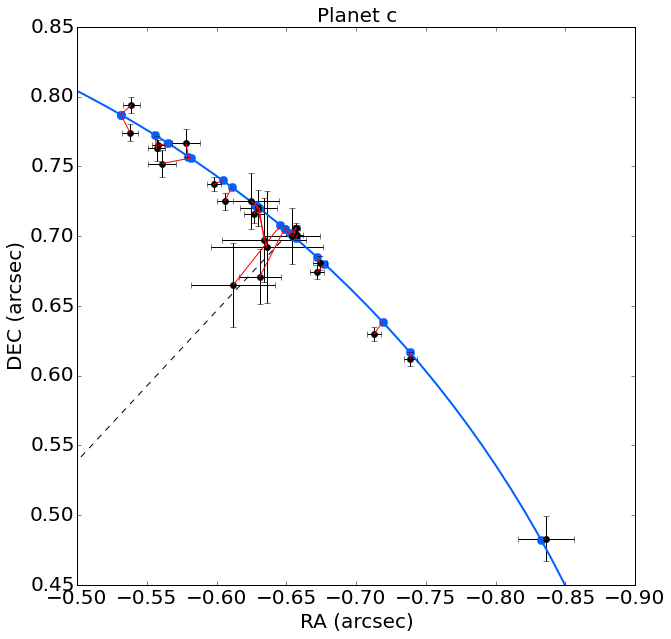

In [22]:
import PyAstrOFit.Orbit as o
import PyAstrOFit.FileHandler as f
from PyAstrOFit.Planet_data import get_planet_data
%matplotlib inline

#path = 'PyAstrOFit/res/exo/hr8799c.txt'
a = 3.80502142e+01        #[A.U.]
e = 4.06273243e-02
i = 2.50047414e+01       #[deg]
node = 3.17132192e+02    #[deg]
w = 8.15415302e+01      #[deg]
tp = 2.46965054e+06 #[JD]

starMass = 1.51     #[solar mass]
starDistance = 39.4 #[pc]

planet = o.Orbit(semiMajorAxis = a,
                   eccentricity = e,
                   inclinaison = i,
                   longitudeAscendingNode = node,
                   periastron = w,
                   periastronTime = tp,
                   dStar = starDistance,
                   starMass = starMass)


planet_data = get_planet_data('hr8799c')
#fileh = f.FileHandler(path)
observation_dates = planet_data[0]['timePosition']
data_RA = planet_data[0]['raPosition']
err_RA = planet_data[1]['raError']
data_DEC = planet_data[0]['decPosition']
err_DEC = planet_data[1]['decError']

planet.showOrbit(pointOfView = 'earth', 
                   unit = 'arcsec', 
                   figsize = (10,10), 
                   title = ['Planet c',20],
                   addPosition = observation_dates,
                   lim = [[-0.9,-0.5],[0.45,0.85]],
                   addPoints = [data_RA,data_DEC,err_RA,err_DEC],
                   link = True,
                   save = (False,'test_hr8799c'),
                   color =(0,0.38,1.),
                   link_color = 'r',
                   addPosition_options={'marker':'o',
                                        'markerfacecolor':(0,0.38,1.),
                                        'markeredgecolor':(0,0.38,1.),
                                        'markersize':8},
                   invert_xaxis=True,
                   invert_yaxis=False,
                   cardinal=(False,'br'))